<a href="https://colab.research.google.com/github/sudarmintosenlau/Image-Classification/blob/main/Submission_Belajar_ML_buat_Pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>INFORMASI DIRI</center></h1>


**Sudarminto Senlau**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
**085739022843**

![an image](https://img.icons8.com/fluent-systems-regular/2x/gmail.png)
**sudarmintosenlau37@gmail.com**

![an image](https://img.icons8.com/material-rounded/2x/address.png)
**Kupang, Nusa Tenggara Timur**

![an image](https://img.icons8.com/fluent-systems-filled/2x/linkedin.png)
[Linkedin](https://www.linkedin.com/in/sudarminto-senlau/)

<h1><center>Submission at Dicoding</center></h1>

#### Klasifikasi Gambar

Membuat program jaringan saraf tiruan menggunakan TensorFlow. Program harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

In [ ]:
# Mengimport Library yang digunakan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset dari website
!wget --no-check-certificate \
        https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
        -O /tmp/rockpaperscissors.zip

--2021-07-27 00:09:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  17.0MB/s    in 22s     

2021-07-27 00:09:37 (14.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Karena Dataset masih dalam bentuk ZIP, kita perlu mengekstrak datanya. Kemudian mendefinisikan suatu direktori untuk data latih dan dan validasi


In [ ]:
#ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# split dataset kemudian membuat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

Dari direktori yang ada, dibuat sub-kategori untuk menampung data training dan data validasi dengan pembagiannya 40% data validasi dari total dataset. 

In [ ]:
# train dan test split
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

Untuk mempersiapkan data dan mengaugmentasi gambar dari data baru menggunakan Image Data Generator.

In [ ]:
# augmentation and generate image data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Dari ukuran pembagian data validasi 40% dari total dataset, ditemukan: Data training memiliki 1312 sampel gambar dengan 3 class, dan Data validasi memiliki 876 sampel gambar dengan 3 class.

Setelah data kita telah siap, kita bisa membangun arsitektur sebuah CNN.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

Setelah membuat arsitektur dari CNN, kemudian memanggil fungsi compile pada object model, dan tentukan loss function serta optimizer.

compile model dengan optimizer = 'Adam' dan loss function = 'categorical_crossentropy'

loss function pada kasus klasifikasi 2 class dan 3 class berbeda. 2 class menggunakan 'binary crossentropy' sedangkan 3 class menggunakan 'categorical_crossentropy'.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 83s - loss: 1.0614 - accuracy: 0.4649 - val_loss: 0.8943 - val_accuracy: 0.5266
Epoch 2/20
41/41 - 82s - loss: 0.6283 - accuracy: 0.7523 - val_loss: 0.3712 - val_accuracy: 0.8738
Epoch 3/20
41/41 - 81s - loss: 0.3313 - accuracy: 0.8727 - val_loss: 0.2436 - val_accuracy: 0.9225
Epoch 4/20
41/41 - 81s - loss: 0.2543 - accuracy: 0.9062 - val_loss: 0.2364 - val_accuracy: 0.9178
Epoch 5/20
41/41 - 83s - loss: 0.2621 - accuracy: 0.9062 - val_loss: 0.2925 - val_accuracy: 0.9016
Epoch 6/20
41/41 - 81s - loss: 0.2153 - accuracy: 0.9184 - val_loss: 0.3123 - val_accuracy: 0.8958
Epoch 7/20
41/41 - 81s - loss: 0.1877 - accuracy: 0.9360 - val_loss: 0.1795 - val_accuracy: 0.9340
Epoch 8/20
41/41 - 81s - loss: 0.1547 - accuracy: 0.9459 - val_loss: 0.1866 - val_accuracy: 0.9340
Epoch 9/20
41/41 - 81s - loss: 0.1503 - accuracy: 0.9489 - val_loss: 0.1495 - val_accuracy: 0.9444
Epoch 10/20
41/41 - 81s - loss: 0.1639 - accuracy: 0.9451 - val_loss: 0.1754 - val_accuracy: 0.9433
Epoch 11/

Meliat Grafik dari 'loss dan training loss' serta 'training accuracy dan validation accuracy'.

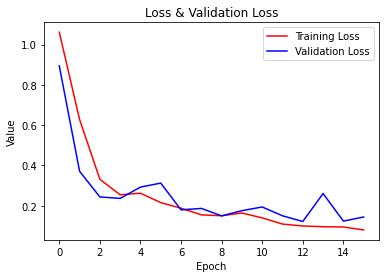

In [ ]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

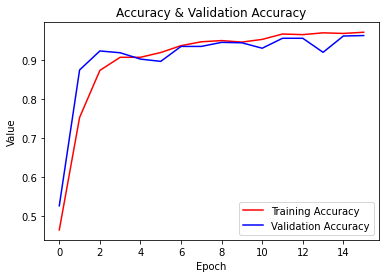

In [ ]:
# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Mengunggah gambar untuk diprediksi

Saving IMG_20210625_011714.jpg to IMG_20210625_011714 (3).jpg


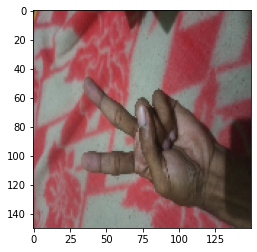

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [ ]:
  print(fn)
  if classes[0,0]!=0:
    print('Gunting')
  elif classes[0,1]!=0:
    print('Batu')
  else:
    print('Kertas')

IMG_20210625_011714.jpg
Gunting
